<a href="https://colab.research.google.com/github/AlphaGamer5/Unsupervised-Learning-on-Iris-Dataset/blob/main/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Shivam Nayak*
---
# Predicting the clusters in Iris Dataset Using Unsupervised Learning
---

### Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Load Dataset from ```sklearn.datasets```

In [81]:
from sklearn.datasets import load_iris

df = load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [82]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [83]:
y = df.target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


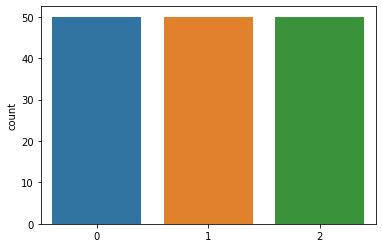

In [84]:
sns.countplot(df.target)

As we can see there are three species of flowers namely **'setosa'**, **'versicolor', 'virginica'** and the dataset has 50 instances of each class. We will use this to evaluate our model.

In [85]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [86]:
df = pd.DataFrame(df.data, columns=df.feature_names)

In [87]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [88]:
Xcopy = df.copy()
Xcopy['target'] = y
Xcopy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Figure size 576x360 with 0 Axes>

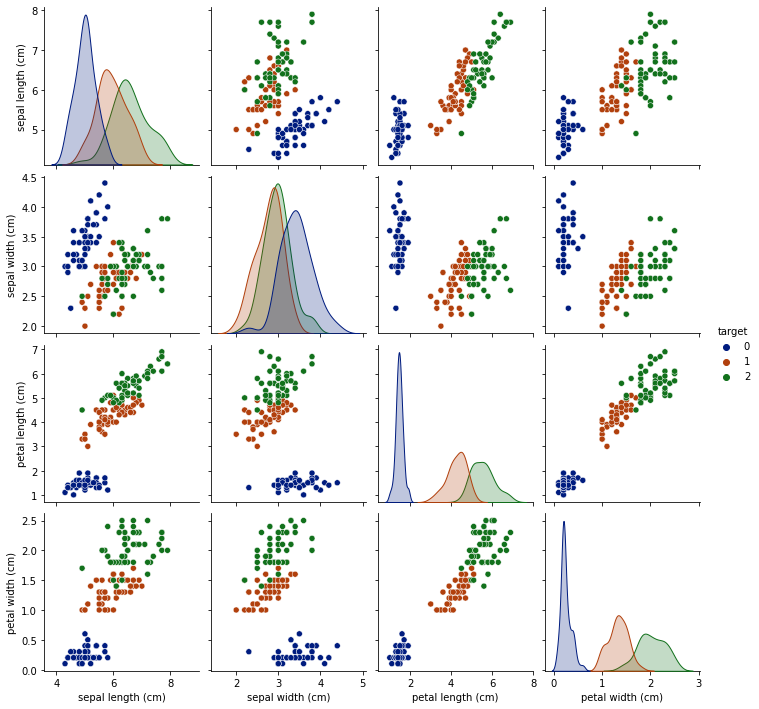

In [89]:
plt.figure(figsize=(8,5))
g = sns.pairplot(Xcopy, hue='target', palette='dark')

Seeing the pairplot we can deduce that one of the cluster is clearly separated from the other one in all of the plots. It shows that one of the cluster is very different from the rest.

###To find out how many clusters there are in the dataset we will use the **Elbow Method**.

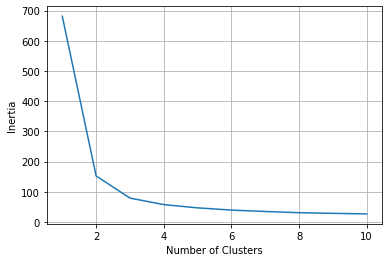

In [90]:
errors = []
for i in range(1,11):
  model = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=0.0001)
  model.fit_predict(df)
  errors.append(model.inertia_)

plt.plot(range(1,11), errors)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Looking at the plot, we can see that the curve bends like an elbow at around **3**. So we can conclude that there are 3 clusters in our data. 

## Building Models

In [91]:
k = 3
kmodel = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, tol=0.0001)
kmodel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [92]:
km_pred = kmodel.labels_
np.unique(km_pred, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

In [93]:
DBModel = DBSCAN()
DBModel.fit(df)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [94]:
DB_pred = DBModel.labels_
np.unique(DB_pred, return_counts=True)

(array([-1,  0,  1]), array([17, 49, 84]))

In [95]:
gmmModel = GaussianMixture(n_components=3)
gmmModel.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [96]:
gmm_pred = gmmModel.predict(df)
np.unique(gmm_pred, return_counts=True)

(array([0, 1, 2]), array([45, 50, 55]))

## Checking Which model Performed the best: **Adjusted Rand Index (ARI)**

In [97]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI of KMeans: ", adjusted_rand_score(y, km_pred))
print("ARI of DBSCAN: ", adjusted_rand_score(y, DB_pred))
print("ARI of gmm: ", adjusted_rand_score(y, gmm_pred))

ARI of KMeans:  0.7302382722834697
ARI of DBSCAN:  0.5206185241703302
ARI of gmm:  0.9038742317748124


- The ARI of Gaussian Mixture Model is the best which shows us that the gaussian modal performed best among all other models.

## Plotting the predictions of different models.

In [98]:
Xcopy['kmeans'] = km_pred
Xcopy['DBSCAN'] = DB_pred
Xcopy['gmm'] = gmm_pred
Xcopy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,kmeans,DBSCAN,gmm
0,5.1,3.5,1.4,0.2,0,1,0,1
1,4.9,3.0,1.4,0.2,0,1,0,1
2,4.7,3.2,1.3,0.2,0,1,0,1
3,4.6,3.1,1.5,0.2,0,1,0,1
4,5.0,3.6,1.4,0.2,0,1,0,1


In [101]:
#### Variables
f1 = 'petal length (cm)'
f2 = 'sepal width (cm)'
palette = [{0: 'blue', 1: 'red', 2: 'green'}, {0: 'red', 1: 'blue', 2: 'green'}, { 0: 'red', 1: 'blue', 2: 'green'}, {0: 'blue', 1: 'red', -1: 'green'}]

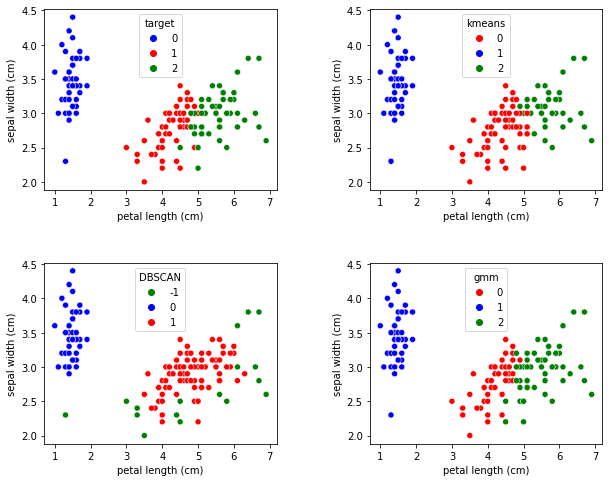

In [102]:
fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=Xcopy,x=f1,y=f2,hue='target',ax=ax, palette=palette[0])
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data=Xcopy,x=f1,y=f2,hue='kmeans',ax=ax, palette=palette[2])
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data=Xcopy,x=f1,y=f2,hue='DBSCAN',ax=ax, palette=palette[-1])
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(data=Xcopy,x=f1,y=f2,hue='gmm',ax=ax, palette=palette[1])
plt.show()

- Looking at the above plot, we can see that **GMM** clearly seems to be doing a *great job* in clustering the points while **DBSCAN** performs *poorly*. This also matches with the **ARI** that we got above.